# Introduction to Descriptive and Predictive Models

This module introduces the core ideas of *machine learning*, which is subdivided into **unsupervised** and **supervised** machine learning.

We break it into three segments:

1. Representing data for building machine learning models.
2. Unsupervised machine learning.
3. Supervised machine learning.

# 3. Supervised Machine Learning

Within supervised machine learning, we often use techniques based on regression -- including artificial neural networks.

Let's start with the technique of **gradient descent**, useful for doing regression.  We'll soon use it for training neural networks, but we'll start simpler.

## 3.4 Gradient Descent

### 3.4.1 Gradient Descent with a Linear Function

To look at gradient descent, let's first consider a simple example, with a linear value for our prediction.  (We'll relax this in a moment to consider the logistic function.)

We can define the cost function to be Mean Squared Error as follows:

$MSE = {1 \over n}\Sigma^n_{i=1}(\hat{y}^{(i)} - y^{(i)})$

where

$\hat{y}^{(i)} = \sigma(w^T \cdot x^{(i)})$.

For this part we'll generate a simple artificial dataset with two "blob" clusters.


In [0]:
from sklearn.datasets import make_blobs

(X, y) = make_blobs(n_samples=1000, n_features=2, centers=2, \
                    cluster_std=1.10, random_state=42)


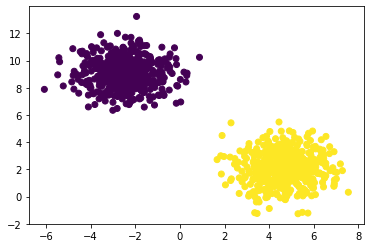

In [0]:
import matplotlib.pyplot as plt


plt.scatter(x=X[:, 0], y=X[:, 1], c=y)

In [0]:
# Reload our data

from sklearn.model_selection import train_test_split
import sklearn.metrics

X_train, X_test, y_train, y_test = train_test_split(X, \
                                                    y, \
                                                    test_size=0.30)

y_train

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,

In [0]:
# Here's our cost function, as mean squared error
def cost_fn(X, y, p, fn):
  if len(X.shape) == 1:
    # Single row, return the squared error
    return np.square(y - fn(X[p]))
  else:
    # Matrix, return the mean of the squared errors
    return np.average([cost_fn(X[i], y[i], p, fn) for i in range (0, X.shape[0])])

# We'll excerpt one instance from the training set
x_sample = X_train[0]
y_sample = y_train[0]

x_sample

array([-2.22756492, 10.09524621])

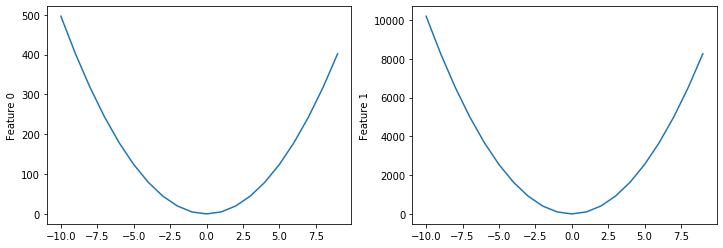

In [0]:
import matplotlib.pyplot as plt

x_coord = range(-10,10)

plt.figure(figsize=(12, 4))

# Now let's plot the error function for a *single instance*, for each feature,
# for a range of weights and the *linear* function x*w
for feature in range(0, 2):
  ax = plt.subplot(1, 2, feature+1)
  ax.plot(x_coord, [cost_fn(x_sample, y_sample, feature, lambda x: x*w) for w in x_coord])
  ax.set_ylabel('Feature ' + str(feature))
  

If you look above, each feature has a parabola, with a different scale and a different minimum.

Now we'll look at *all* of the instances, for one feature. 

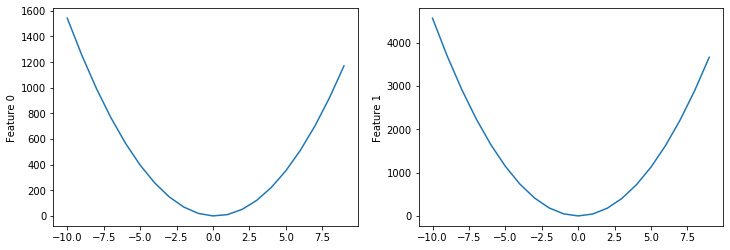

In [0]:
import matplotlib.pyplot as plt

x_coord = range(-10,10)

plt.figure(figsize=(12, 4))

# Now let's plot the error function for each feature,
# for a range of weights and the *linear* function x*w
for feature in range(0, 2):
  ax = plt.subplot(1, 2, feature+1)
  ax.plot(x_coord, [cost_fn(X_train, y_train, feature, lambda x: x*w) for w in x_coord])
  ax.set_ylabel('Feature ' + str(feature))
  

## Gradient Descent for Training Logistic Regression

Let's try this with logistic regression, using the sigmoid function...

[ 1.20868414 -0.33207069]
[0.7669322536811578, 0.7450735091921676, 0.7152774052115443, 0.6707845159620122, 0.6022986099784523, 0.5058211957314869, 0.396607878917284, 0.30243122642381814, 0.23542010627362908, 0.190193321320067, 0.1586071168950543, 0.13529398820273264, 0.11725660531226086, 0.1028177372812301, 0.0909826497575147, 0.08111783443494801, 0.07279247636884265, 0.06569762659286175, 0.05960268011323472, 0.05433040446883612, 0.049741658635789186, 0.04572546957867718, 0.04219225279227956, 0.03906898781862188, 0.03629567482374876, 0.0338226688828797, 0.03160863770093324, 0.029618974846594464, 0.027824553142704763, 0.026200736381570607, 0.024726589822138257, 0.02338424527379145, 0.02215838744832898, 0.0210358361491176, 0.02000520469110402, 0.019056619309338354, 0.018181487621403796, 0.01737230674027377, 0.016622503586503103, 0.01592630146503075, 0.015278608156776041, 0.014674921706193715, 0.014111250821124573, 0.013584047384561183, 0.013090149042781782, 0.012626730206315958, 0.012191

Text(0, 0.5, 'Mean-squared error (loss)')

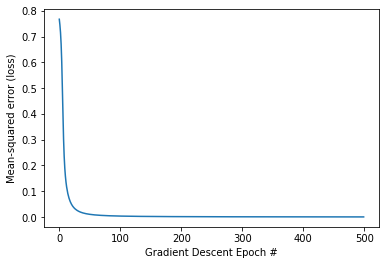

In [0]:
import numpy as np

# Here is our sigmoid function for making
# predictions with logistic regression
# or with perceptron-style neural nets
def prediction(x):
  return 1.0 / (1 + np.exp(-x))


def gradient_descent(epochs, eta, X, w, y):
  """
  The gradient descent iterates for *epochs* rounds, making a step
  of size eta.  It will be adjusting w, based on the prediction for each
  instance vs y and the overall error.
  """
  # We'll use this list to accumulate
  # the error
  overall_error = []
  # Iterate over each epoch
  for i in range(epochs):
    # This is y-hat, the predictions for each
    # class label before they are thresholded
    # based on comparison with 0.5
    predictions = prediction(X.dot(w))

    # The overall error, as a vector
    error = (predictions - y)

    # Record the MSE so we can plot it
    mean_sq_error = np.sum(error ** 2) / X.shape[0]
    overall_error.append(mean_sq_error)

    # Now we update the weights.
    # The gradient is based on the partial derivative
    # of the MSE with respect to w.
    gradient = 2 / X.shape[0] * X.T.dot(error)

    w = w - eta * gradient

  return w, overall_error

# Training rounds or epochs
epochs = 500
eta = 0.01

w = np.random.randn(2)

weights, evect = gradient_descent(epochs, eta, X, w, y)
print (weights)
print (evect)

# Plot the mean-squared error
plt.plot(range(0,epochs), evect)
plt.xlabel('Gradient Descent Epoch #')
plt.ylabel('Mean-squared error (loss)')

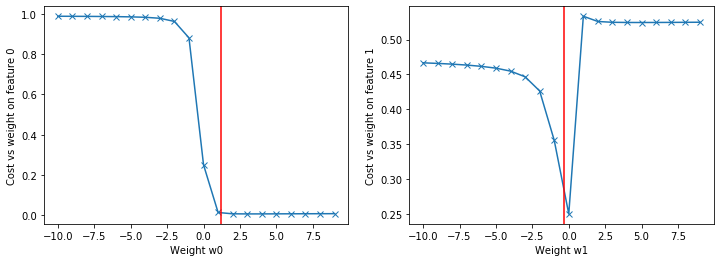

In [0]:
x_coord = range(-10,10)

plt.figure(figsize=(12, 4))

# Now let's plot the error function for each feature,
# for a range of weights and the output of the sigmoid function over x*w
for feature in range(0, 2):
  ax = plt.subplot(1, 2, feature+1)
  ax.plot(x_coord, [cost_fn(X_train, y_train, feature, lambda x: prediction(x*w)) for w in x_coord],
          marker='x')

  ax.axvline(x=weights[feature], color='red')
  ax.set_ylabel('Cost vs weight on feature ' + str(feature))
  ax.set_xlabel('Weight w' + str(feature))

We've trained the weights -- let's make predictions!

In [0]:
for item in range(len(X_test)):
  predicted_label = 0 if prediction(X_test[item].dot(weights)) < 0.5 else 1

  print('Prediction {} vs {}'.format(predicted_label, y_test[item]))

Prediction 0 vs 0
Prediction 1 vs 1
Prediction 0 vs 0
Prediction 1 vs 1
Prediction 0 vs 0
Prediction 0 vs 0
Prediction 0 vs 0
Prediction 1 vs 1
Prediction 1 vs 1
Prediction 1 vs 1
Prediction 1 vs 1
Prediction 0 vs 0
Prediction 0 vs 0
Prediction 1 vs 1
Prediction 0 vs 0
Prediction 0 vs 0
Prediction 0 vs 0
Prediction 0 vs 0
Prediction 0 vs 0
Prediction 1 vs 1
Prediction 1 vs 1
Prediction 0 vs 0
Prediction 1 vs 1
Prediction 1 vs 1
Prediction 0 vs 0
Prediction 1 vs 1
Prediction 1 vs 1
Prediction 0 vs 0
Prediction 1 vs 1
Prediction 0 vs 0
Prediction 0 vs 0
Prediction 1 vs 1
Prediction 1 vs 1
Prediction 1 vs 1
Prediction 0 vs 0
Prediction 0 vs 0
Prediction 1 vs 1
Prediction 1 vs 1
Prediction 1 vs 1
Prediction 1 vs 1
Prediction 1 vs 1
Prediction 1 vs 1
Prediction 1 vs 1
Prediction 0 vs 0
Prediction 0 vs 0
Prediction 0 vs 0
Prediction 1 vs 1
Prediction 0 vs 0
Prediction 0 vs 0
Prediction 1 vs 1
Prediction 1 vs 1
Prediction 1 vs 1
Prediction 1 vs 1
Prediction 0 vs 0
Prediction 0 vs 0
Prediction

In [0]:
from sklearn.linear_model import Perceptron

clf = Perceptron(random_state=42)
clf.fit(X_train, y_train)

clf.predict(X_test)

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0])

# Multilayer Perceptrons

Let's load some data suitable for training a simple multilayer perceptron.  The MNIST dataset has handwritten letters and we can train a classifier to predict the written digit.

In [0]:
from sklearn.datasets import fetch_openml

# Load data from https://www.openml.org/d/554
X, y_str = fetch_openml('mnist_784', version=1, return_X_y=True)

y = np.array([int(x) for x in y_str])

In [0]:
# Each row has 784 pixels
X[1].shape

(784,)

In [0]:
# Which really represents a 28x28 grid...
img = X[1].reshape(28,28)

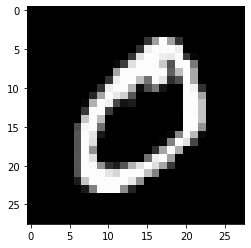

In [0]:
import matplotlib.pyplot as plt

plt.imshow(img, cmap='gray')

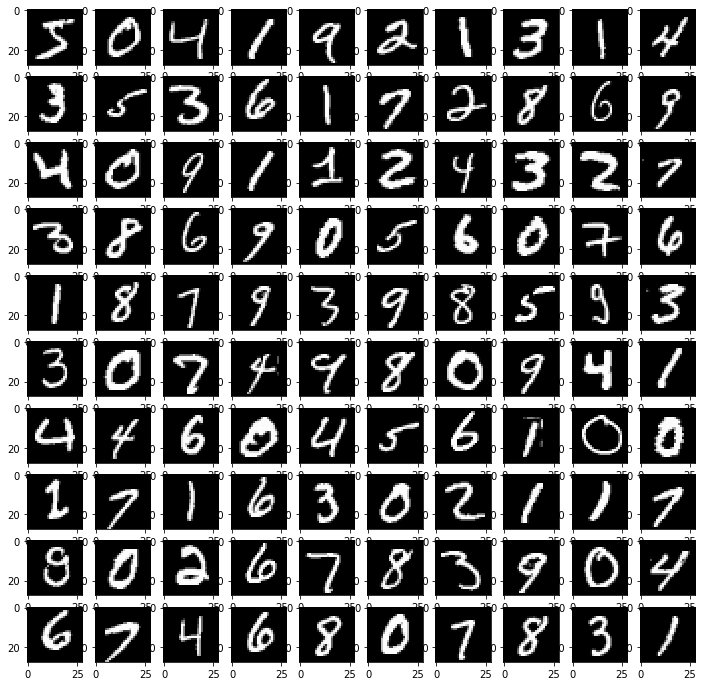

In [0]:
plt.figure(figsize=(12, 12))

for img in range(100):
  ax = plt.subplot(10, 10, img+1)
  plt.imshow(X[img].reshape(28,28), cmap='gray')

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, \
                                                    y, \
                                                    test_size=0.30)


In [0]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10,10))
mlp.fit(X_train, y_train)

mlp.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([8, 0, 6, ..., 3, 3, 3])

## Implementing the MLP

Let's see how this would look under the covers!

In [0]:
from scipy.special import expit

class FFClassifier:
  layer_weights = []
  costs = []
  epochs = 100
  eta = 0.001
  decrease_eta = 0.000001

  # Initialize weights for each layer
  def __init__(self, features, hidden_layers, classes, epochs=100, eta=0.001):
    # Initial weights = 1 for each feature, plus 1 for bias
    first = np.random.uniform(-1.0, 1.0, size=hidden_layers[0] * (features+1))\
        .reshape(hidden_layers[0], features+1)
    self.layer_weights.append(first)
    self.epochs = epochs
    self.eta = eta
    print ('Initial hidden layer:', first.shape)

    # "Middle" hidden layers
    for layer in range(0, len(hidden_layers) - 1):
      hidden = np.random.uniform(-1.0, 1.0, size=(hidden_layers[layer]+1) * hidden_layers[layer+1])\
              .reshape(hidden_layers[layer+1], hidden_layers[layer]+1)
      self.layer_weights.append(hidden)
      print ('Hidden layer:', hidden.shape)

    # Last
    last_layer = len(hidden_layers) - 1
    hidden = np.random.uniform(-1.0, 1.0, size=(hidden_layers[last_layer]+1) * classes)\
            .reshape(classes, hidden_layers[last_layer]+1)
    self.layer_weights.append(hidden)
    print ('Last layer:', hidden.shape)

    return

  # expit is a version of sigmoid
  def activation(self, sigma):
    return expit(sigma)

  def feed_forward(self, X):
    sums = []
    layer_outputs = []
    layer = 0

    X_with_bias = np.ones((X.shape[1] + 1, X.shape[0]))
    X_with_bias[1:, 0:] = X.T

    # Dot products for weights from inputs to next
    # layer
    result = self.layer_weights[0].dot(X_with_bias)
    sums.append(result)
    # Run them through sigmoid
    result = self.activation(result)
    layer_outputs.append(result)
    print (result.shape)

    for layer in range(1, len(self.layer_weights)):
      layer_with_bias = np.ones((result.shape[0] + 1, result.shape[1]))
      layer_with_bias[1:, :] = result

      result = self.layer_weights[layer].dot(layer_with_bias)
      sums.append(result)
      result = self.activation(result)
      layer_outputs.append(result)
      print (result.shape)

    return sums, layer_outputs, result

  @staticmethod
  def onehot_encode(y):
    classes = np.unique(y).shape[0]
    ret = np.zeros((classes, y.shape[0]))
    for i, v in enumerate(y):
      ret[v, i] = 1.0

    return onehot.T

  def cost(self, y_onehot, output):
    term1 = -y_enc * (np.log(output + 1e-5))
    term2 = (1. - y_enc) * np.log(1. - output + 1e-5)
    return np.sum(term1 - term2)

  def fit(self, X, y_onehot):
    X_tmp = X.copy()
    y_tmp = y_onehot.copy()

    eta = self.eta
    for i in range(self.epochs):
      eta /= (1 + self.decrease_eta)

      shuffle = np.random.permutation(y_tmp.shape[0])
      X_tmp, y_tmp = X_tmp[shuffle], y_tmp[:, shuffle]

      sums, layer_outputs, result = self.feed_forward(X_tmp)

      cost = self.cost(y_tmp, result)
      self.costs.append(cost)

  def predict(self, X):
    sums, layer_outputs, result = self.feed_forward(X)

    return np.argmax(result, axis=0)

clf = FFClassifier(X.shape[1], [15, 15], 10)
y_oh = FFClassifier.onehot_encode(y_train)
clf.predict(X_train)


Initial hidden layer: (15, 785)
Hidden layer: (15, 16)
Last layer: (10, 16)


NameError: ignored

In [0]:
y